In [1]:
import pandas as pd
import numpy as np
import pickle
import glob
import time
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_pickle('../features/train__000__raw_data.pkl')
df_test = pd.read_pickle('../features/test__000__raw_data.pkl')
target = pd.read_pickle('../features/target__000__raw_data.pkl')

In [6]:
df_train = pd.concat([df_train, target[['lifespan']]], axis=1)

C:\Users\linda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


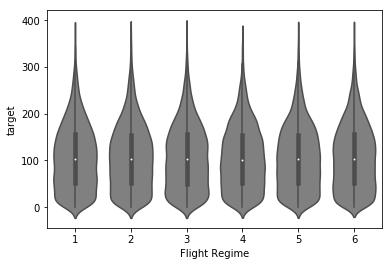

In [10]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.violinplot(x='Flight Regime', y='lifespan', data=df_train, color='gray', ax=ax)

ax.set_xlabel('Flight Regime')
ax.set_ylabel('target')
plt.show()

Flight Regimeによるtargetのばらつきはほぼなさそう

In [15]:
col_list = list(df_train.columns)

In [26]:
def violin_plot_by_FlightRegime(df, column, num):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    sns.violinplot(x='Flight Regime', y=column, data=df_train, ax=ax)

    ax.set_xlabel('Flight Regime')
    ax.set_ylabel(str(num)+ '_' + column)
    plt.show()

C:\Users\linda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


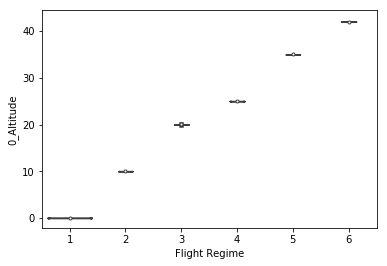

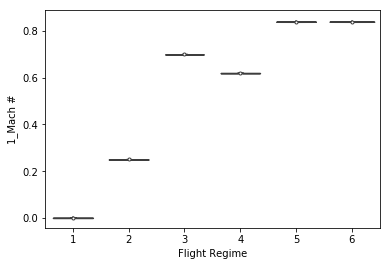

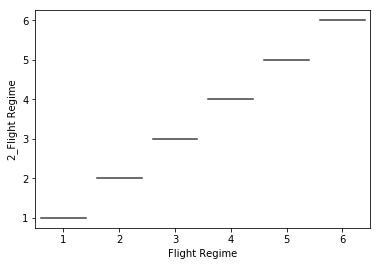

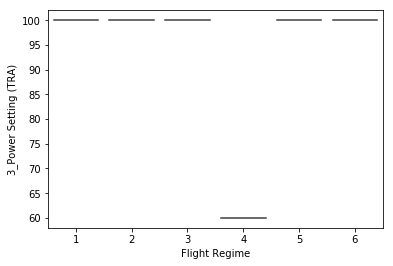

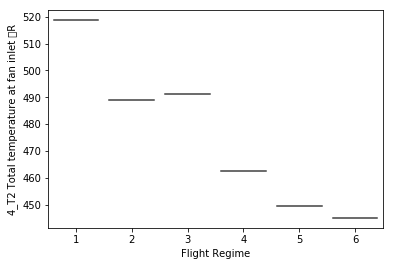

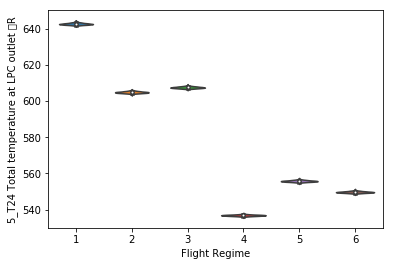

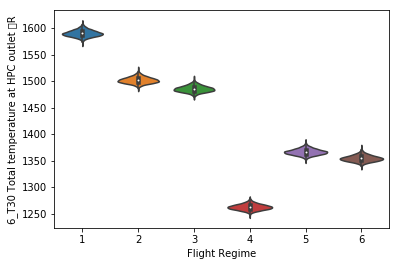

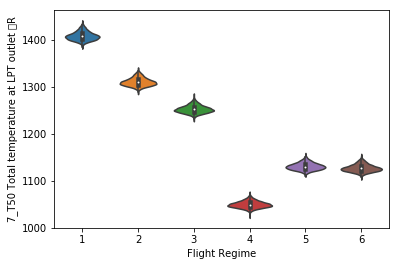

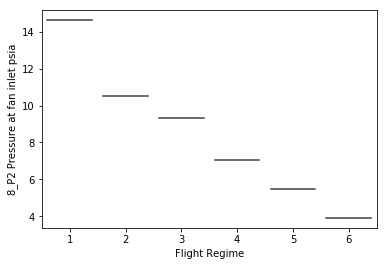

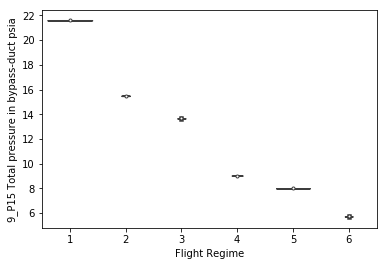

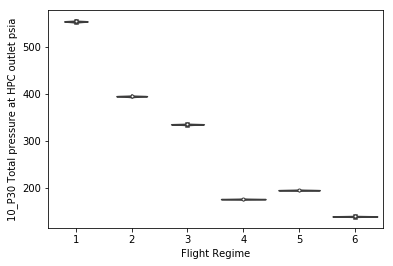

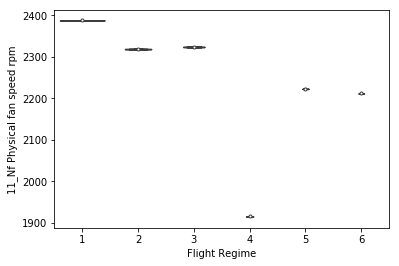

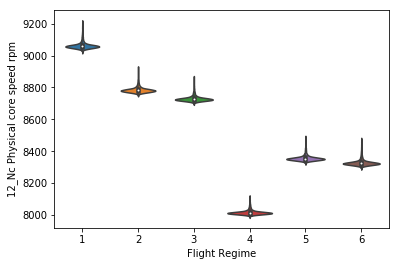

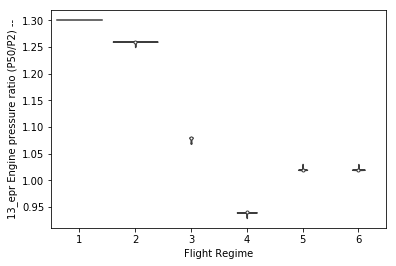

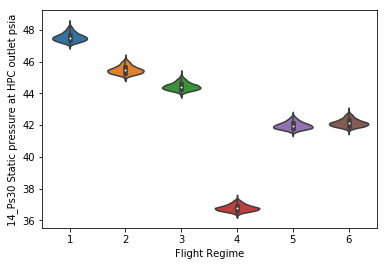

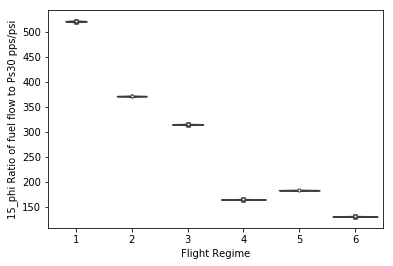

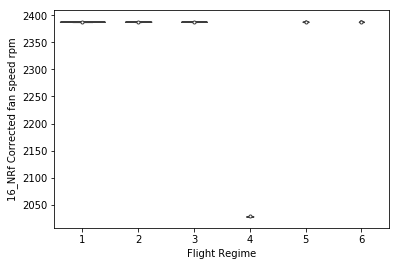

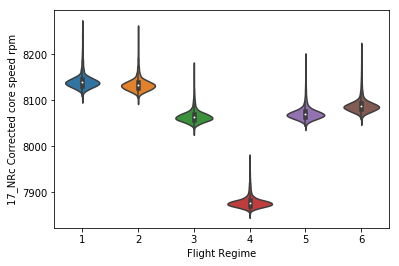

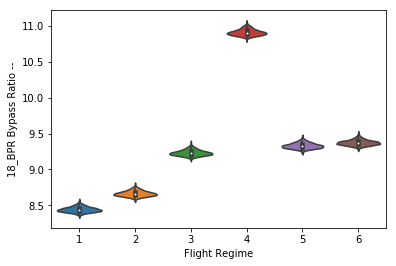

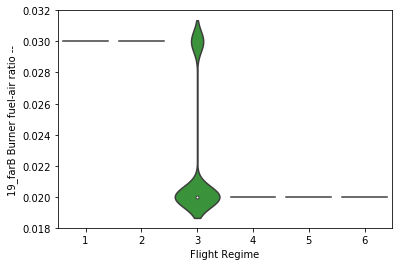

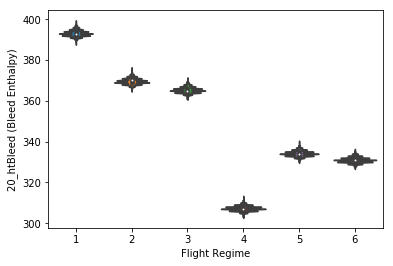

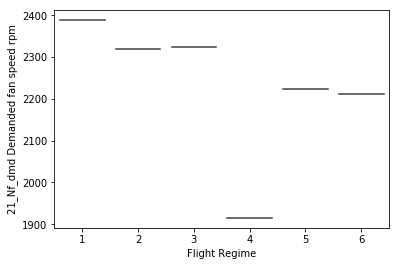

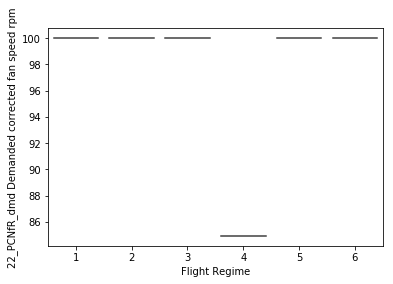

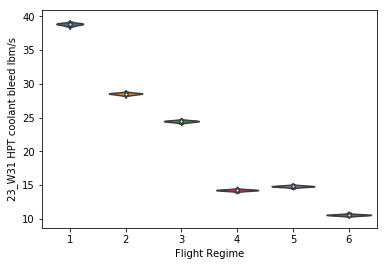

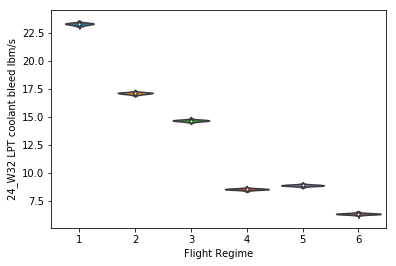

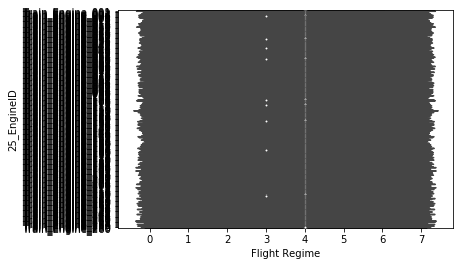

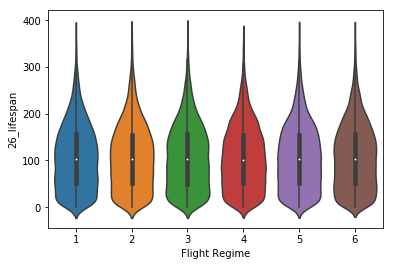

In [27]:
for i in range(len(col_list)):
    violin_plot_by_FlightRegime(df_train, col_list[i], i)

col_list[5, 6, 7, 12, 14, 17, 18, 19, 20, 23, 24]あたり使えそう

In [36]:
def plot_trend_features(df, column, num):
    plt.figure(figsize=(11,8))
    for i, grp in df.groupby(['EngineID', 'Flight Regime']):
        plt.plot(grp['lifespan'], grp[column], linewidth=0.1)
    plt.xlabel('lifespan')
    plt.ylabel(str(num) + '_' + column)
    plt.show()

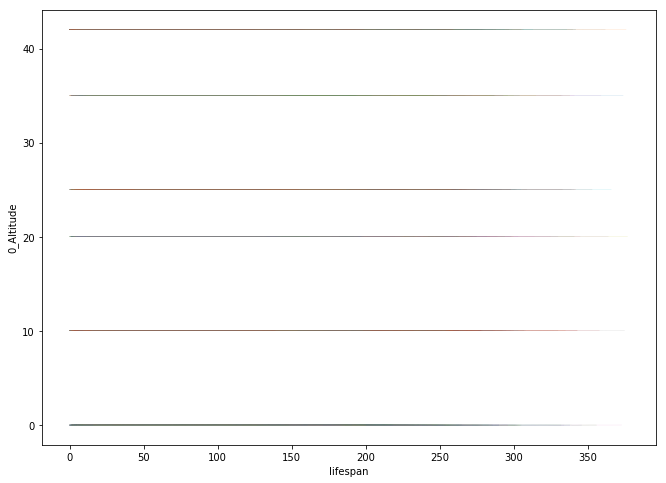

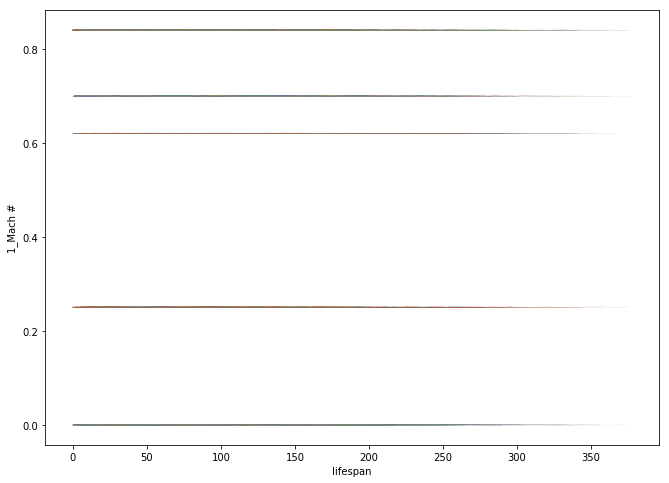

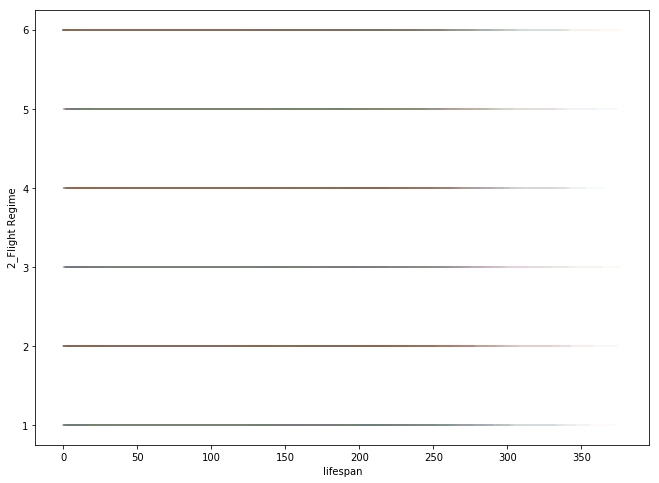

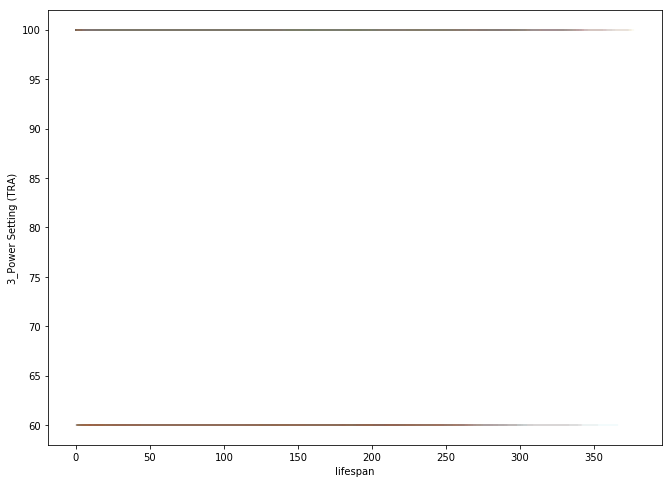

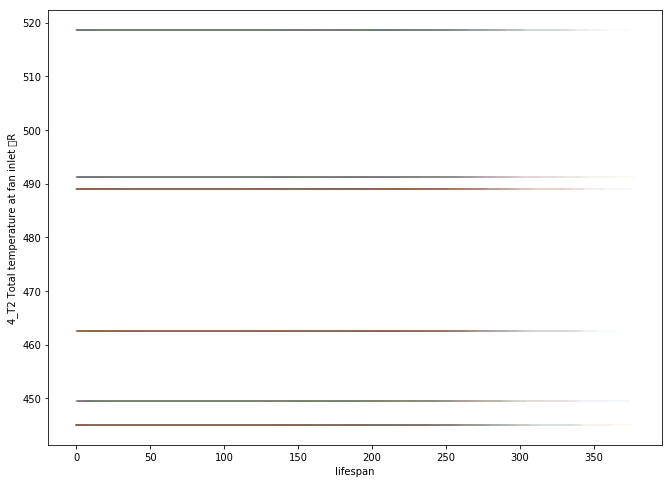

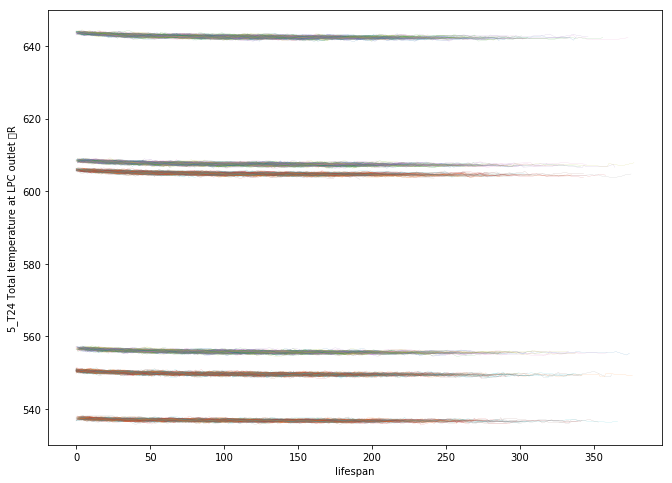

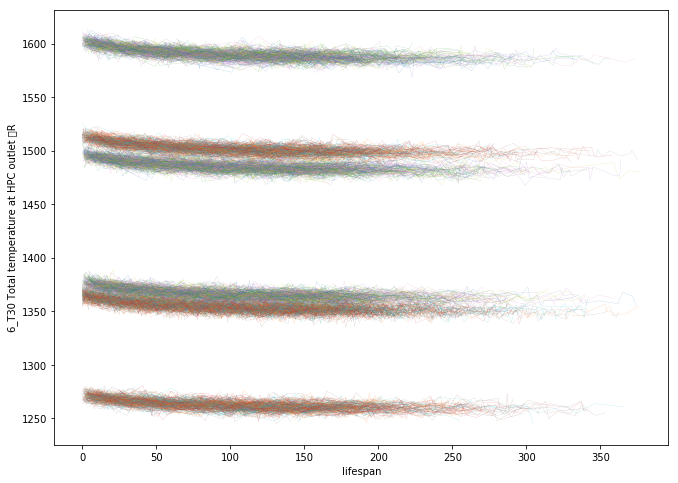

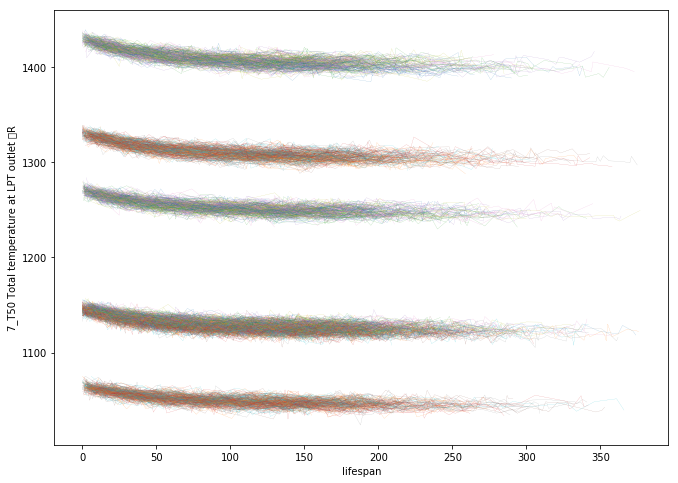

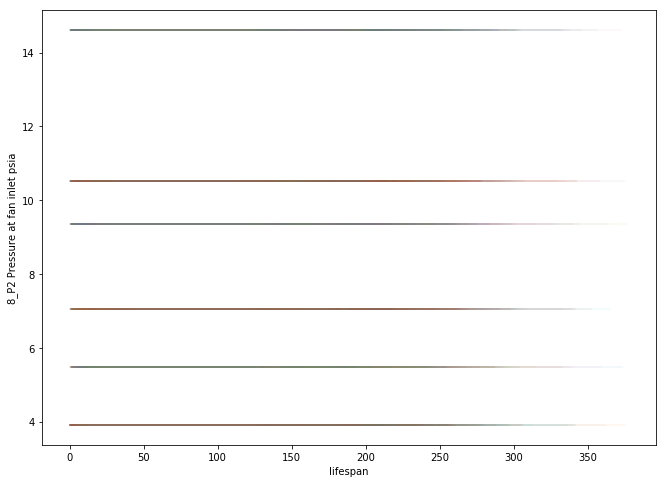

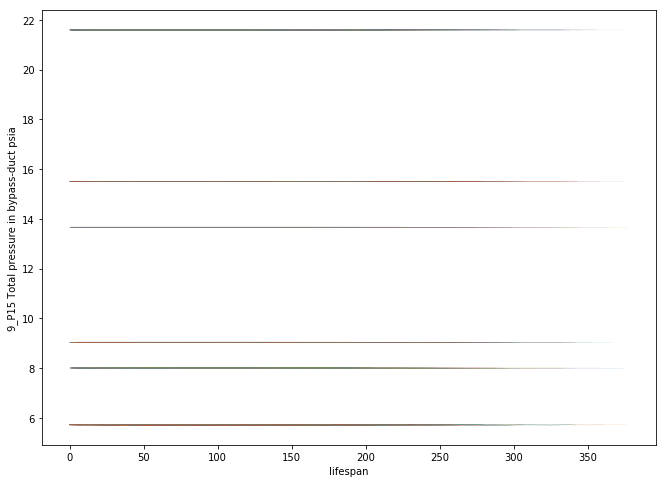

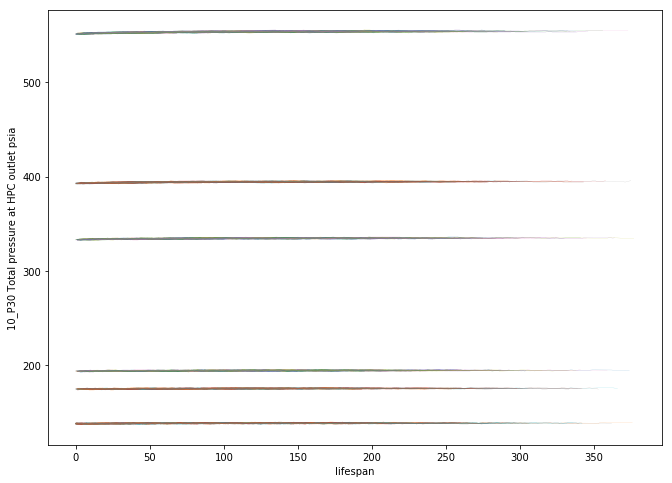

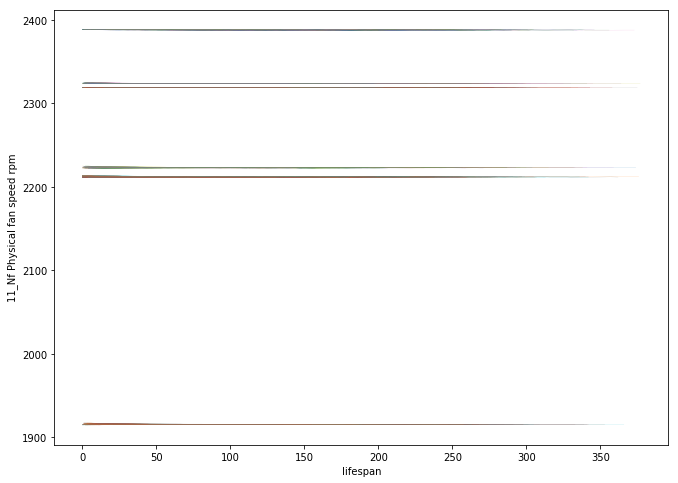

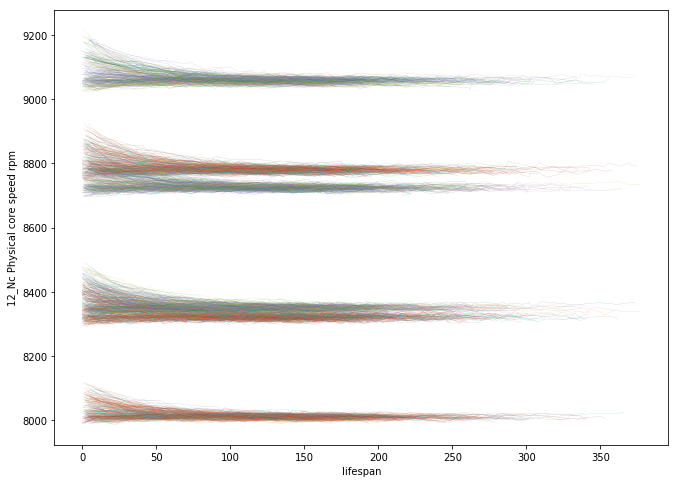

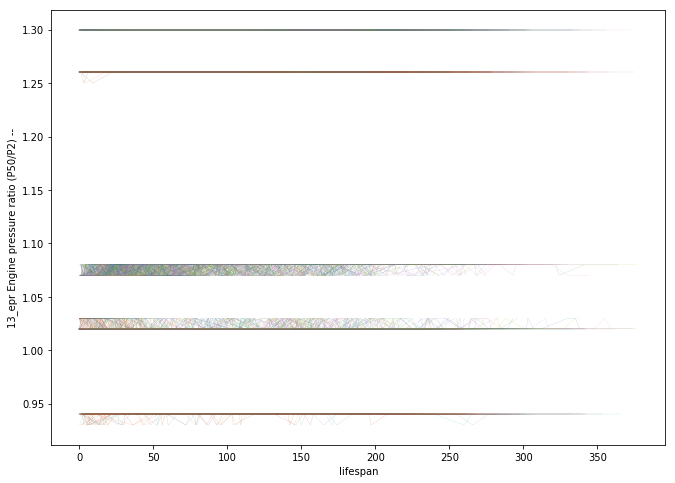

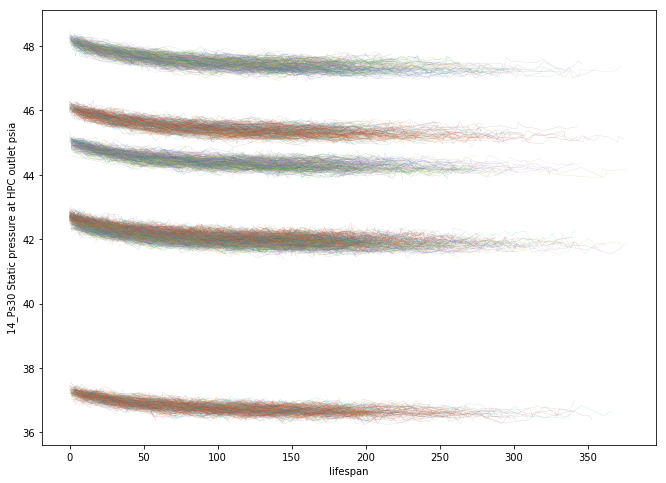

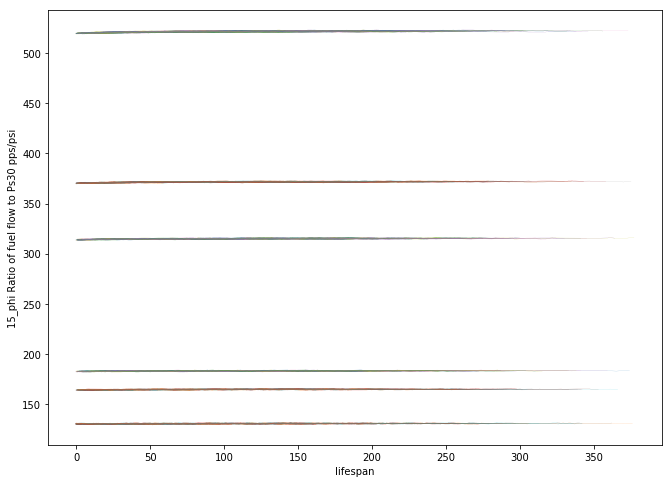

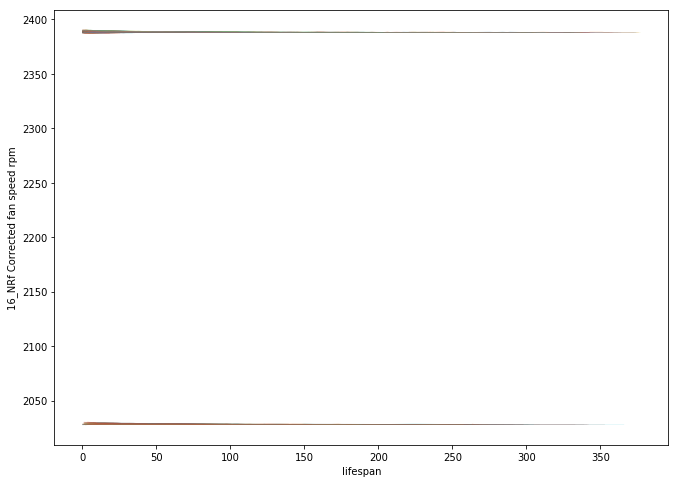

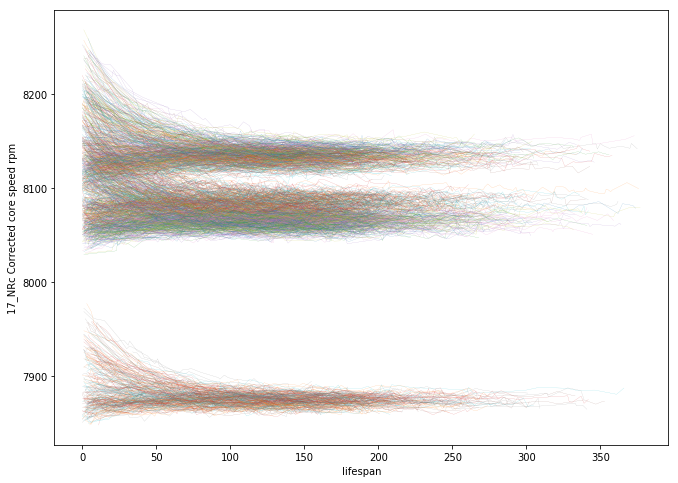

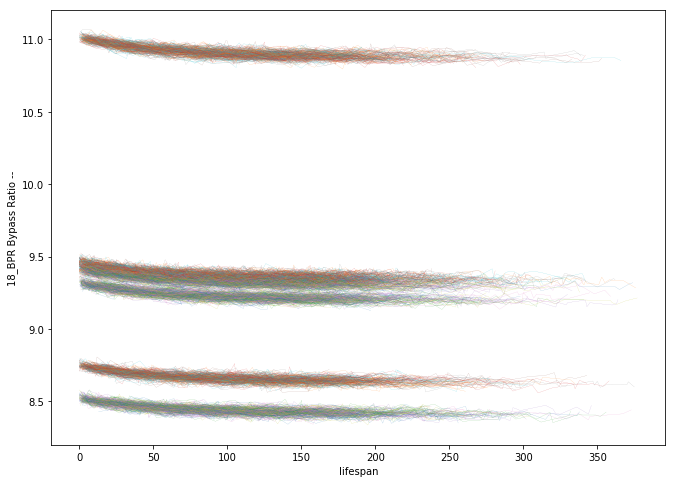

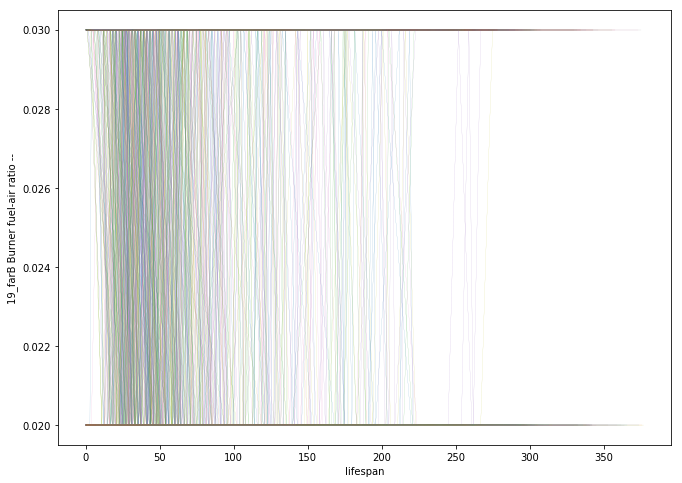

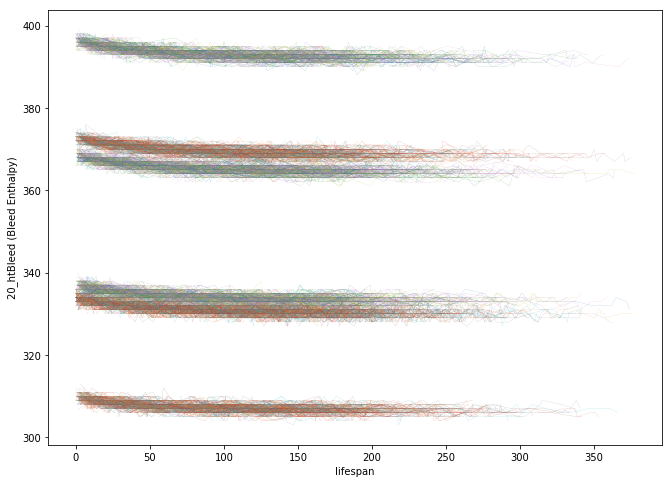

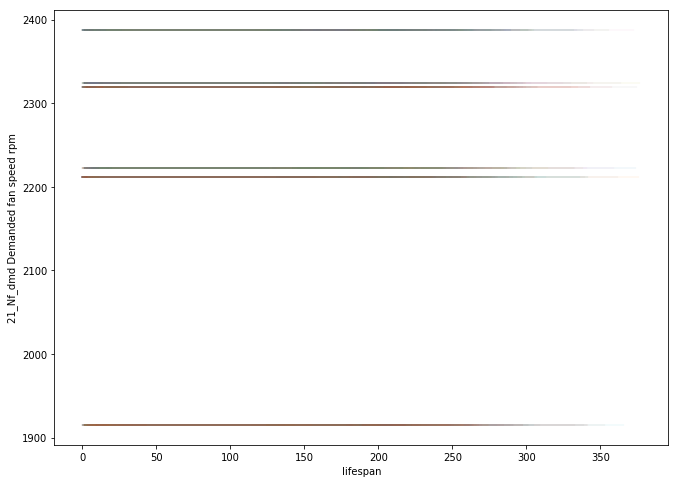

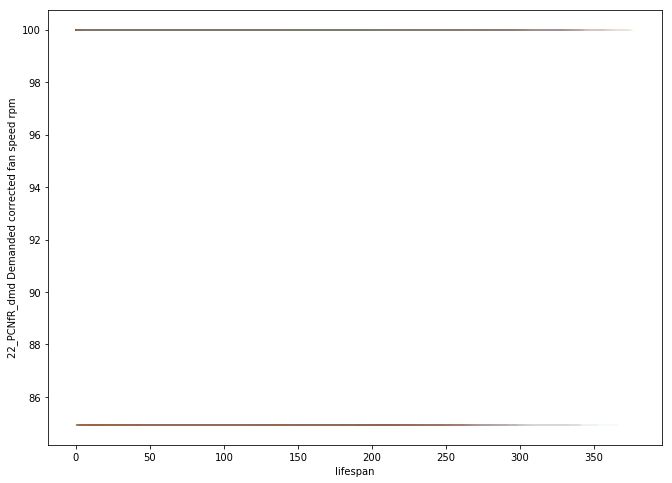

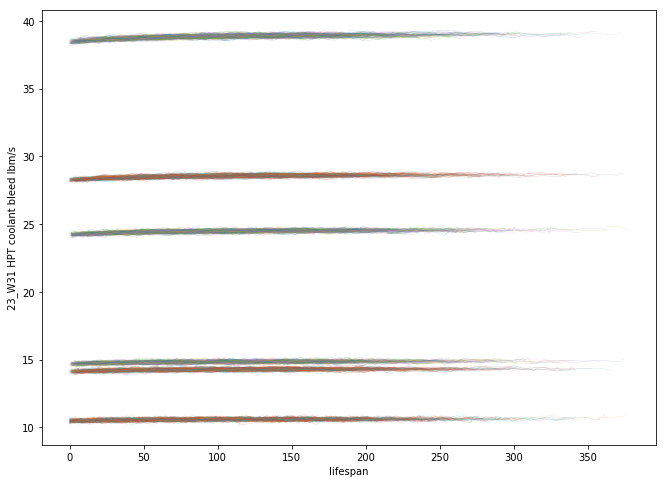

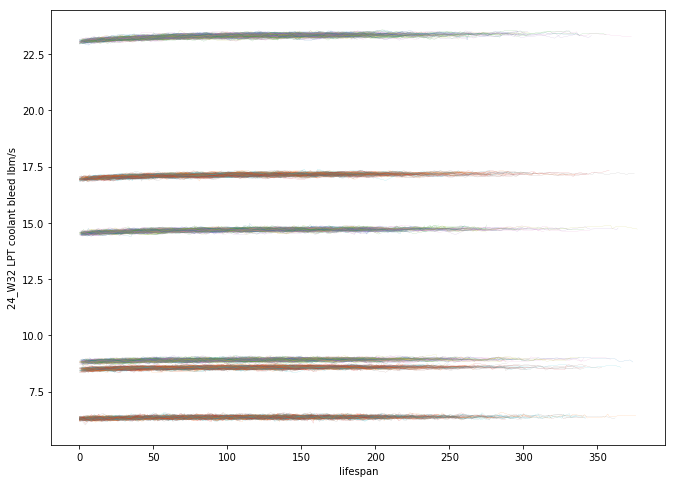

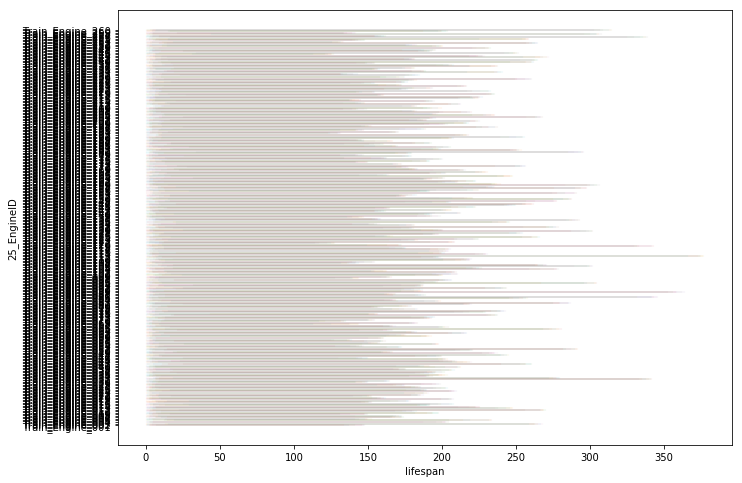

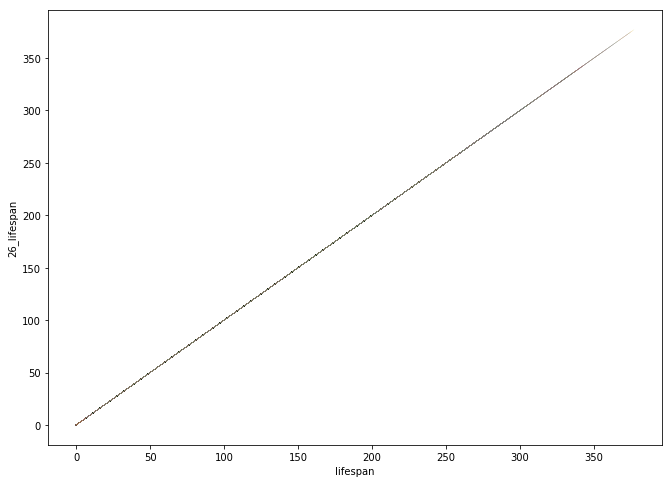

In [37]:
for (i, col) in enumerate(col_list):
    plot_trend_features(df_train, col, i)